In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

houses.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [6]:
houses = houses[['saleprice','overallqual','grlivarea','garagecars','garagearea','totalbsmtsf','fullbath','yearbuilt','yearremodadd']]

features = list(houses.columns)
features.remove('saleprice')
print('features (len: {}): {}\ntarget: saleprice'.format(len(features),{i for i in features}))

X = houses[features]

Y = houses['saleprice']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

results = sm.OLS(Y, X).fit()

results.summary()

features (len: 8): {'overallqual', 'garagecars', 'fullbath', 'grlivarea', 'yearbuilt', 'yearremodadd', 'totalbsmtsf', 'garagearea'}
target: saleprice
The number of observations in the training set is 1168
The number of observations in the test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     615.5
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:21:52   Log-Likelihood:                -17463.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1451   BIC:                         3.499e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.158e+06   1.28e+05     -9.030      0.000   -1.41e+06   -9.07e+05
overallqual   1.923e+04   1183.567     16.248      0.000    1.69e+04    2.16e+04
grlivarea       53.8303      2.996     17.968      0.000      47.953      59.707
garagecars    1.054e+04   3039.969      3.467      0.001    4576.313    1.65e+04
garagearea      16.8986     10.286      1.643      0.101      -3.278      37.075
totalbsmtsf     28.9796      2.885     10.044      0.000      23.320      34.639
fullbath     -6394.9604   2660.790     -2.403      0.016   -1.16e+04   -1175.555
yearbuilt      257.9006     50.164      5.141      0.000     159.499     356.302
yearremodadd   294.6293     63.752      4.621      0.000     169.573     419.685
==============================================================================
Omnibus:                      485.531   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60951.563
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                      34.641   Cond. No.                     4.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predict the house prices in the test set, and evaluate the performance of the model

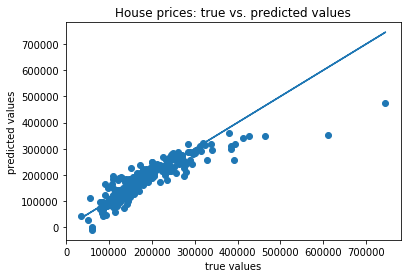

In [7]:
# predict house prices using test set
y_preds = results.predict(X_test)

# plot results against actual values
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test)
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("House prices: true vs. predicted values")
plt.show()

The model made close predictions for true values that are under almost 350K. For the values over 350K, it tends to underestimate the real value.

In [5]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error of the prediction is: 24523.319838012238
Mean squared error of the prediction is: 1413763176.64313
Root mean squared error of the prediction is: 37600.042242571086
Mean absolute percentage error of the prediction is: 14.801950751554838


The performance may or may not be satisfactory. The average error per prediction is off by $24,523.

Let's use log-transformation and predict the model again:

In [8]:
houses['saleprice_log'] = np.log(houses['saleprice'])
houses.head()

,saleprice,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,fullbath,yearbuilt,yearremodadd,saleprice_log
0,208500,7,1710,2,548,856,2,2003,2003,12.248
1,181500,6,1262,2,460,1262,2,1976,1976,12.109
2,223500,7,1786,2,608,920,2,2001,2002,12.317
3,140000,7,1717,3,642,756,1,1915,1970,11.849
4,250000,8,2198,3,836,1145,2,2000,2000,12.429


In [9]:
features = list(houses.columns)
features.remove('saleprice')
features.remove('saleprice_log')
print('features (len: {}): {}\ntarget: saleprice_log'.format(len(features),{i for i in features}))

X = houses[features]

Y = houses['saleprice_log']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(Y, X).fit()

results.summary()

features (len: 8): {'overallqual', 'garagecars', 'fullbath', 'grlivarea', 'yearbuilt', 'yearremodadd', 'totalbsmtsf', 'garagearea'}
target: saleprice_log


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          saleprice_log   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     823.5
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:27:04   Log-Likelihood:                 518.46
No. Observations:                1460   AIC:                            -1019.
Df Residuals:                    1451   BIC:                            -971.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8506      0.574      4.963      0.000       1.724       3.977
overallqual      0.0933      0.005     17.602      0.000       0.083       0.104
grlivarea        0.0002   1.34e-05     18.247      0.000       0.000       0.000
garagecars       0.0738      0.014      5.422      0.000       0.047       0.101
garagearea    5.657e-05   4.61e-05      1.228      0.220   -3.38e-05       0.000
totalbsmtsf      0.0001   1.29e-05      9.671      0.000    9.96e-05       0.000
fullbath        -0.0160      0.012     -1.344      0.179      -0.039       0.007
yearbuilt        0.0018      0.000      8.128      0.000       0.001       0.002
yearremodadd     0.0022      0.000      7.714      0.000       0.002       0.003
==============================================================================
Omnibus:                      994.212   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43000.326
Skew:                          -2.604   Prob(JB):                         0.00
Kurtosis:                      29.072   Cond. No.                     4.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the table above the log transformation did improve the model. Let us perform how it does with prediction:

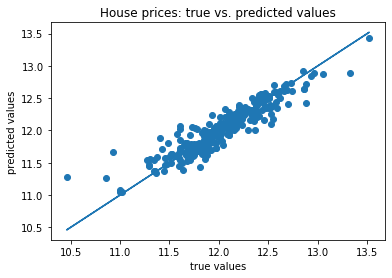

In [10]:
# predict house prices using test set
y_preds = results.predict(X_test)

# plot results against actual values
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test)
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("House prices: true vs. predicted values")
plt.show()

Based in the visualization, this model's errors are limited compared to the previous one and does performs well. Let's see the performance metrics:

In [12]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean absolute error of the prediction is: 0.11172788758383861
Mean squared error of the prediction is: 0.024592403607987905
Root mean squared error of the prediction is: 0.156819653130556
Mean absolute percentage error of the prediction is: 0.9349667968505078


The performance matrics are better than the previouse model. The MAPE values is much lower for this model.